# Loading in our data from main.ipynb to build the initial model

### Loading the data

In [ ]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

with open("prepared_data.pkl", "rb") as f:
    data = pickle.load(f)

X_train = data["X_train"]
X_val = data["X_val"]
X_test = data["X_test"]
y_train = data["y_train"]
y_val = data["y_val"]
y_test = data["y_test"]
class_weights_dict = data["class_weights"]
num_classes = data["num_classes"]

### Data Normalization

In [12]:
X_train = X_train.astype("float32") / 255.0
X_val   = X_val.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

### Building the model

In [13]:
def leNet_model(num_classes):
    model = Sequential()

    model.add(Conv2D(60, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

model = leNet_model(num_classes)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 60)     │         4,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1080)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       540,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │        12,024 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 573,314 (2.19 MB)

 Trainable params: 573,314 (2.19 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=50,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict,
    shuffle=True,
    verbose=1
)

Epoch 1/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2494 - loss: 2.1792 - val_accuracy: 0.3785 - val_loss: 2.1032
Epoch 2/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3958 - loss: 1.6960 - val_accuracy: 0.4655 - val_loss: 1.7513
Epoch 3/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4449 - loss: 1.5345 - val_accuracy: 0.4723 - val_loss: 1.7117
Epoch 4/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4741 - loss: 1.4383 - val_accuracy: 0.4921 - val_loss: 1.6308
Epoch 5/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4992 - loss: 1.3310 - val_accuracy: 0.4943 - val_loss: 1.5869
Epoch 6/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5150 - loss: 1.2440 - val_accuracy: 0.5068 - val_loss: 1.5523
Epoch 7/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5371 - loss: 1.1704 - val_accuracy: 0.5123 - val_loss: 1.5008
Epoch 8/15
819/819 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5535 - loss: 1.0820 - val_accuracy: 0.

### Evaluating the model

285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6024 - loss: 1.2147
Test Loss: 1.50946044921875
Test Accuracy: 0.5605494379997253


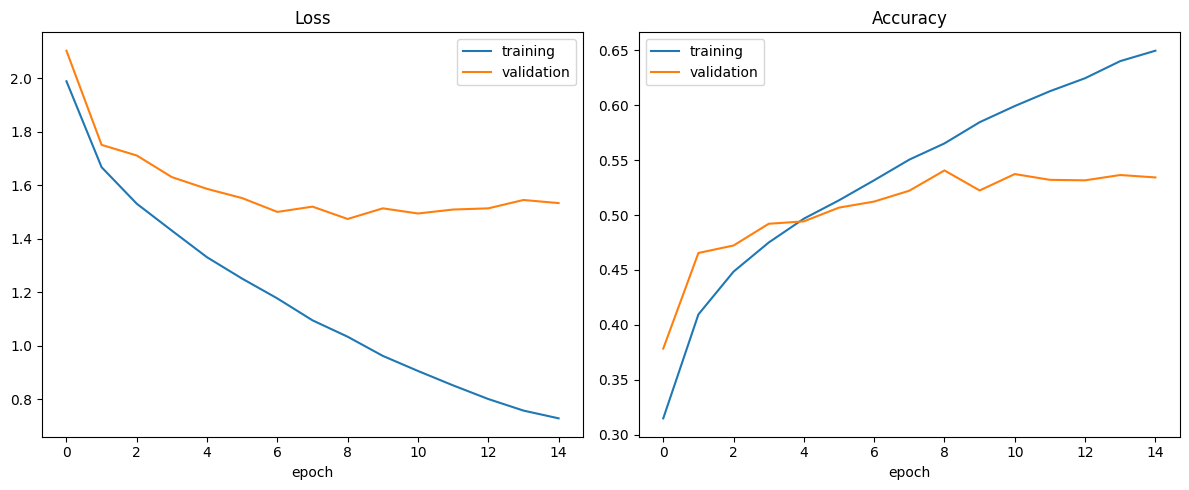

In [15]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

plt.figure(figsize=(12,5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title("Loss")
plt.xlabel("epoch")

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title("Accuracy")
plt.xlabel("epoch")

plt.tight_layout()
plt.show()


Testing with random images

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


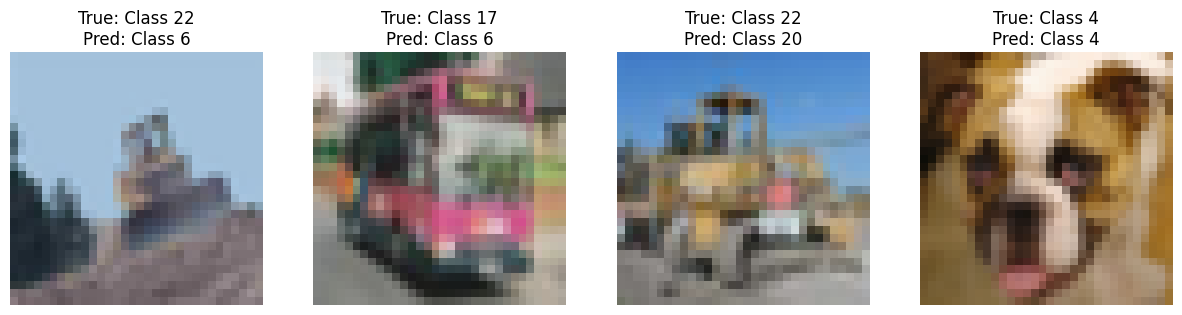

In [16]:
class_names = [f"Class {i}" for i in range(num_classes)]

num_samples = 4
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    image = X_test[idx]
    true_label = y_test[idx]

    pred_probs = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred_probs)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {class_names[true_label]}\nPred: {class_names[pred_label]}")

plt.show()
